In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('../2. Data Preprocessing/processed_tmdb_data.csv')

print(df_train.columns)

Index(['budget', 'action', 'adventure', 'fantasy', 'science fiction', 'comedy',
       'crime', 'drama', 'mystery', 'thriller',
       ...
       'prosthetic makeup artist', 'special guest director',
       'lead set dresser', 'set dressing production assistant',
       'vfx production coordinator', 'radio play', 'tattoo designer',
       'tattooist', 'additional still photographer',
       'mechanical & creature designer'],
      dtype='object', length=574)


In [3]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                                                        int64
action                                                        int64
adventure                                                     int64
fantasy                                                       int64
science fiction                                               int64
comedy                                                        int64
crime                                                         int64
drama                                                         int64
mystery                                                       int64
thriller                                                      int64
romance                                                       int64
war                                                           int64
horror                                                        int64
animation_x                                                   int64
family                                          

(11664, 574)

In [17]:
# New df for non-text columns
df = df_train.loc[:, ["budget", "popularity", "production_companies", "production_countries", "weekday", "day", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]]
# Remove rows where revenue = 0
df = df[df.revenue != 0]

# total number of rows and columns
print(df.shape)
# Randomly sample 5 records with .sample(5)
df.sample(5)

(5499, 21)


budget  popularity  production_companies  production_countries  \
10197  10284523    4.820166                     4                     1   
9608   14000000   44.135568                     4                     2   
9023   20000000    2.003047                     1                     1   
8308   35000000   19.286099                     2                     2   
7464   82000000   39.127082                     4                     1   

       weekday   day  month    year    revenue  runtime     ...      \
10197      5.0  21.0   10.0  2005.0   11588205    104.0     ...       
9608       5.0   2.0    9.0  2005.0  178043761    134.0     ...       
9023       5.0  14.0    8.0  1998.0   37672350    124.0     ...       
8308       4.0  22.0   12.0  1994.0   99423521    102.0     ...       
7464       4.0  24.0    3.0  2011.0   89792502    110.0     ...       

       vote_count  weighted_rating  malecastsnum  femalecastsnum  \
10197          75         6.996112           NaN             NaN   
9608         1480         7.027946           5.0             6.0   
9023           24         6.999041           NaN             NaN   
8308          325         6.962784          11.0             2.0   
7464         1623         6.932941           NaN             NaN   

       unknowngendercastsnum  totalcasts  malecrewsnum  femalecrewsnum  \
10197                    NaN         NaN           NaN             NaN   
9608                     4.0        15.0           7.0            10.0   
9023                     NaN         NaN           NaN             NaN   
8308                     1.0        14.0          10.0             1.0   
7464                     NaN         NaN           NaN             NaN   

       unknowngendercrewsnum  totalcrews  
10197                    NaN         NaN  
9608                    17.0        34.0  
9023                     NaN         NaN  
8308                     7.0        18.0  
7464                     NaN         NaN  

[5 rows x 21 columns]

In [18]:
# Get summary statistics using .describe()
df.describe()
#df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

budget   popularity  production_companies  production_countries  \
count  5.499000e+03  5499.000000           5499.000000           5499.000000   
mean   2.757598e+07    19.603878              2.907438              1.360793   
std    3.891891e+07    29.065106              2.023322              0.775229   
min    0.000000e+00     0.019984              0.000000              0.000000   
25%    1.500000e+06     5.841643              2.000000              1.000000   
50%    1.400000e+07     9.452808              2.000000              1.000000   
75%    3.500000e+07    24.503991              4.000000              2.000000   
max    3.800000e+08   875.581305             26.000000             12.000000   

           weekday          day        month         year       revenue  \
count  5499.000000  5499.000000  5499.000000  5499.000000  5.499000e+03   
mean      4.234770    15.420804     6.933806  1999.954173  8.261262e+07   
std       1.312136     8.473572     3.350179    13.443578  1.568089e+08   
min       1.000000     1.000000     1.000000  1916.000000  1.000000e+00   
25%       3.000000     8.000000     4.000000  1993.000000  6.221279e+06   
50%       5.000000    15.000000     7.000000  2004.000000  2.729745e+07   
75%       5.000000    22.000000    10.000000  2010.000000  8.949008e+07   
max       7.000000    31.000000    12.000000  2016.000000  2.787965e+09   

           runtime     ...         vote_count  weighted_rating  malecastsnum  \
count  5499.000000     ...        5499.000000      5499.000000   2254.000000   
mean    107.886707     ...         721.109111         6.992630      8.210736   
std      19.840316     ...        1210.410179         0.035585      4.901375   
min       0.000000     ...           0.000000         6.715498      0.000000   
25%      95.000000     ...         108.000000         6.984410      5.000000   
50%     104.000000     ...         294.000000         6.995450      7.000000   
75%     118.000000     ...         757.000000         6.999553     11.000000   
max     338.000000     ...       13752.000000         7.390359     45.000000   

       femalecastsnum  unknowngendercastsnum   totalcasts  malecrewsnum  \
count     2254.000000            2254.000000  2254.000000   2254.000000   
mean         4.139752               3.880657    16.231145      8.111801   
std          2.953928               4.956665     8.929039      5.544311   
min          0.000000               0.000000     0.000000      0.000000   
25%          2.000000               1.000000    11.000000      4.000000   
50%          4.000000               3.000000    15.000000      7.000000   
75%          6.000000               5.000000    20.000000     11.000000   
max         23.000000              58.000000   102.000000     67.000000   

       femalecrewsnum  unknowngendercrewsnum   totalcrews  
count     2254.000000            2254.000000  2254.000000  
mean         2.082964               9.975155    20.169920  
std          2.457584              15.520538    20.495612  
min          0.000000               0.000000     0.000000  
25%          0.000000               2.000000     8.000000  
50%          1.000000               4.000000    14.000000  
75%          3.000000              11.000000    24.000000  
max         31.000000             146.000000   193.000000  

[8 rows x 21 columns]

In [19]:
# Missing Values Summary
# total row counts
df['runtime'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

budget                   5499
popularity               5499
production_companies     5499
production_countries     5499
weekday                  5499
day                      5499
month                    5499
year                     5499
revenue                  5499
runtime                  5499
vote_average             5499
vote_count               5499
weighted_rating          5499
malecastsnum             2254
femalecastsnum           2254
unknowngendercastsnum    2254
totalcasts               2254
malecrewsnum             2254
femalecrewsnum           2254
unknowngendercrewsnum    2254
totalcrews               2254
dtype: int64
budget                      0
popularity                  0
production_companies        0
production_countries        0
weekday                     0
day                         0
month                       0
year                        0
revenue                     0
runtime                     0
vote_average                0
vote_count                 

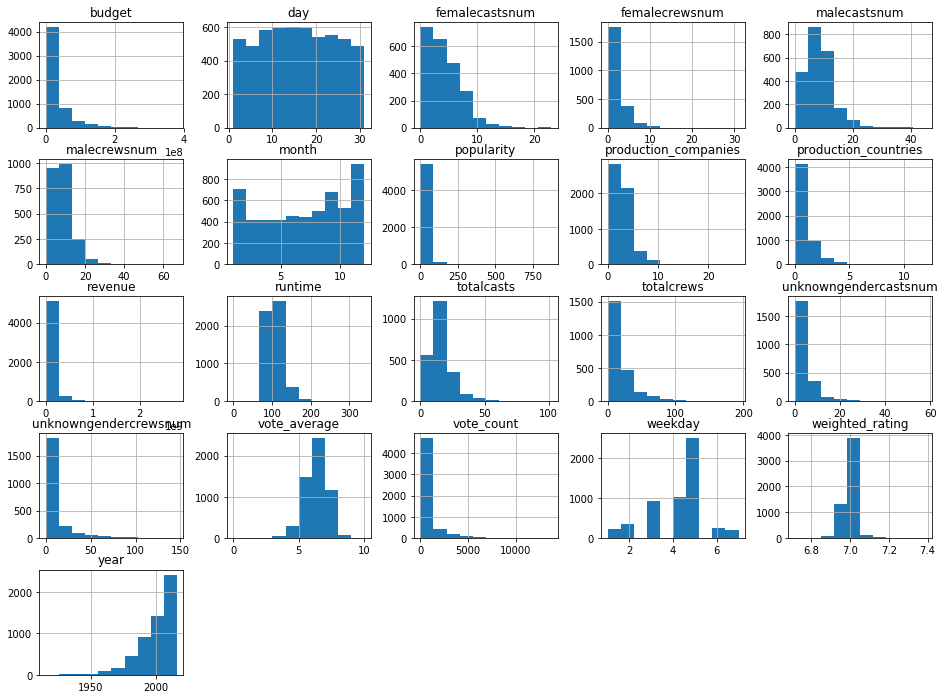

In [20]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

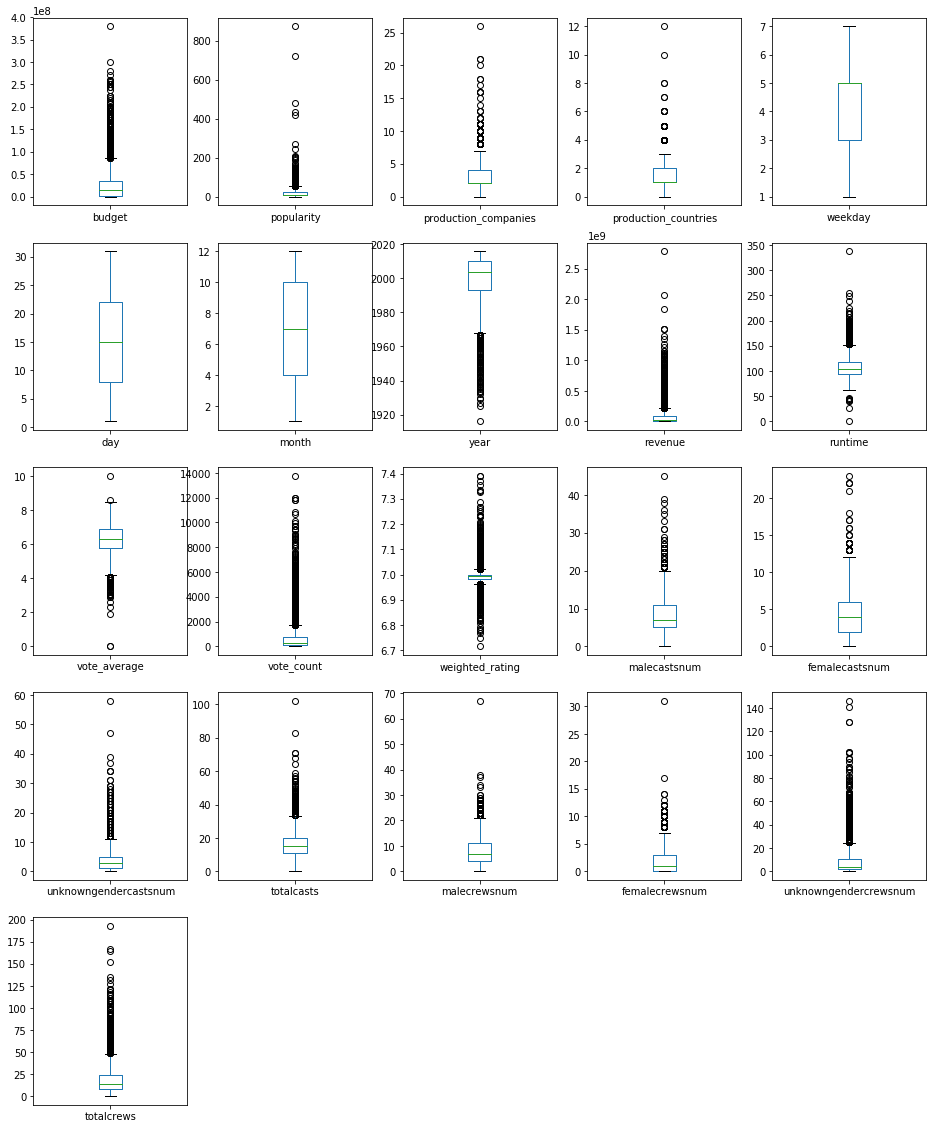

In [21]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,20]
# Plot boxplots for all attributes
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

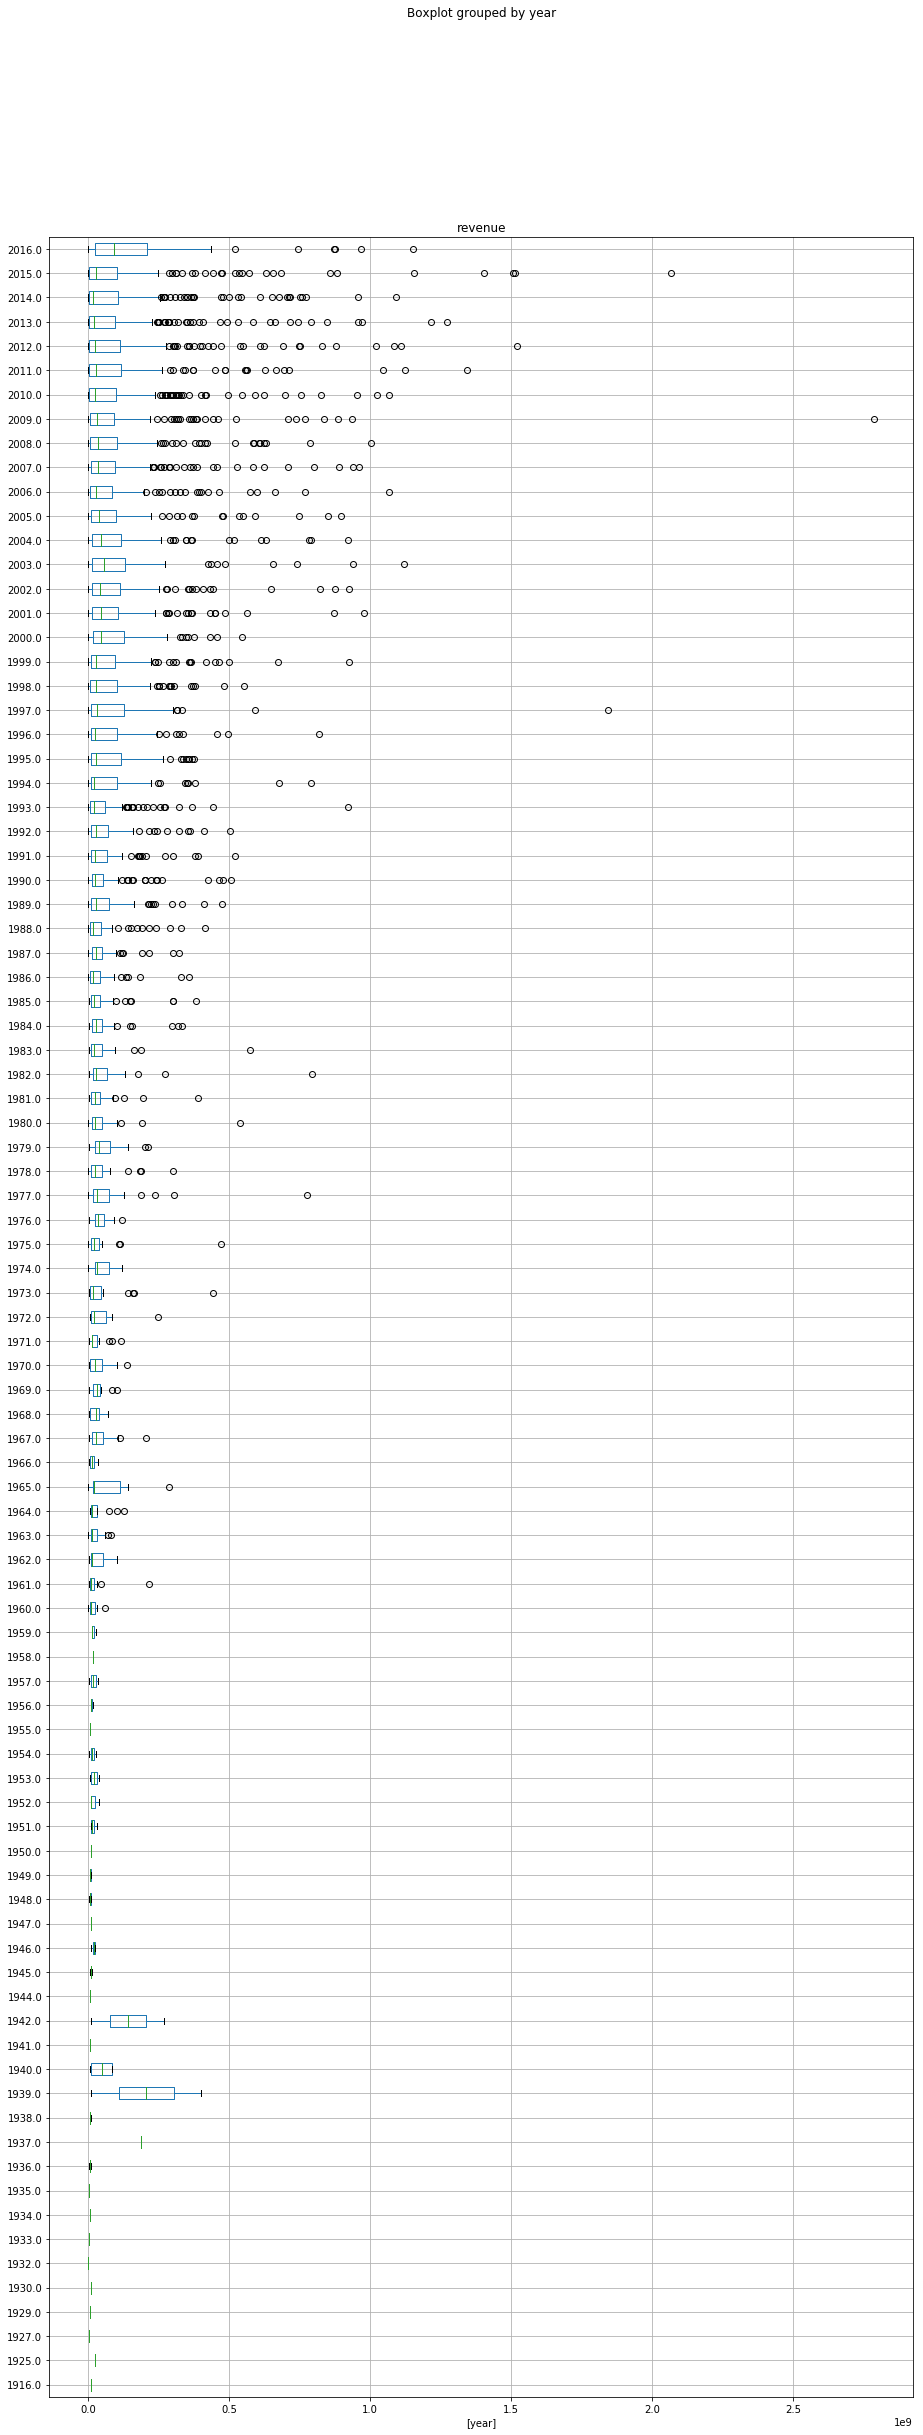

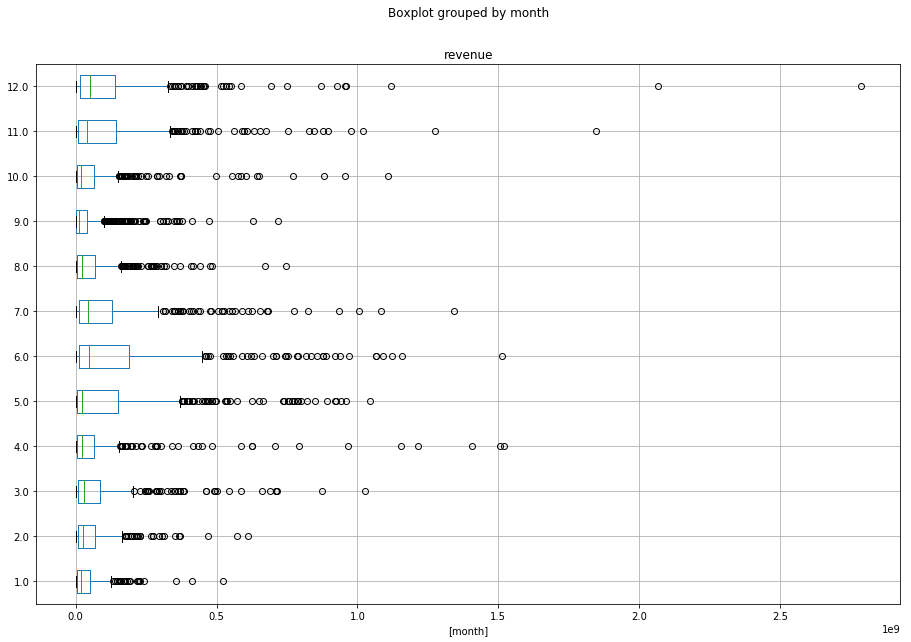

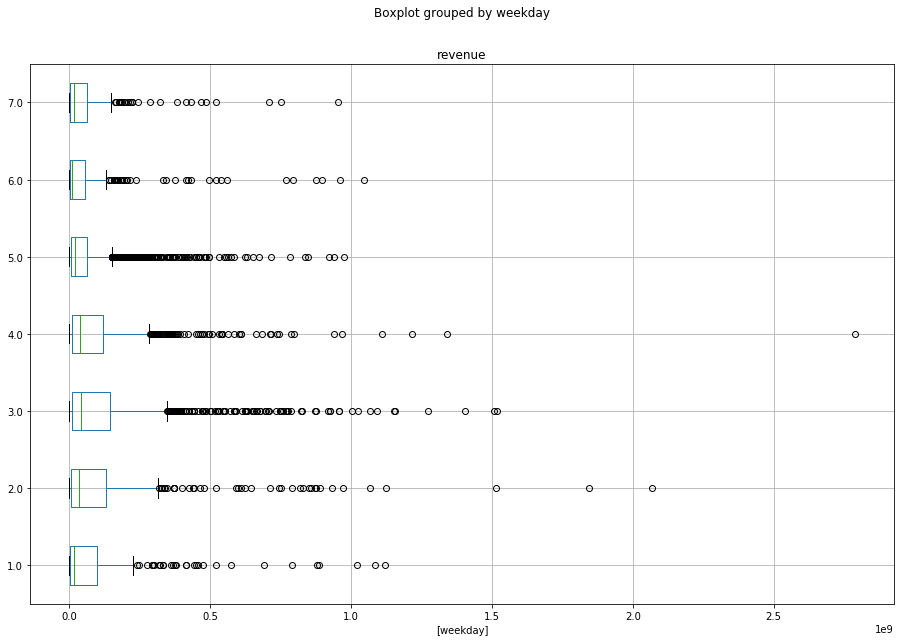

In [22]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['revenue', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

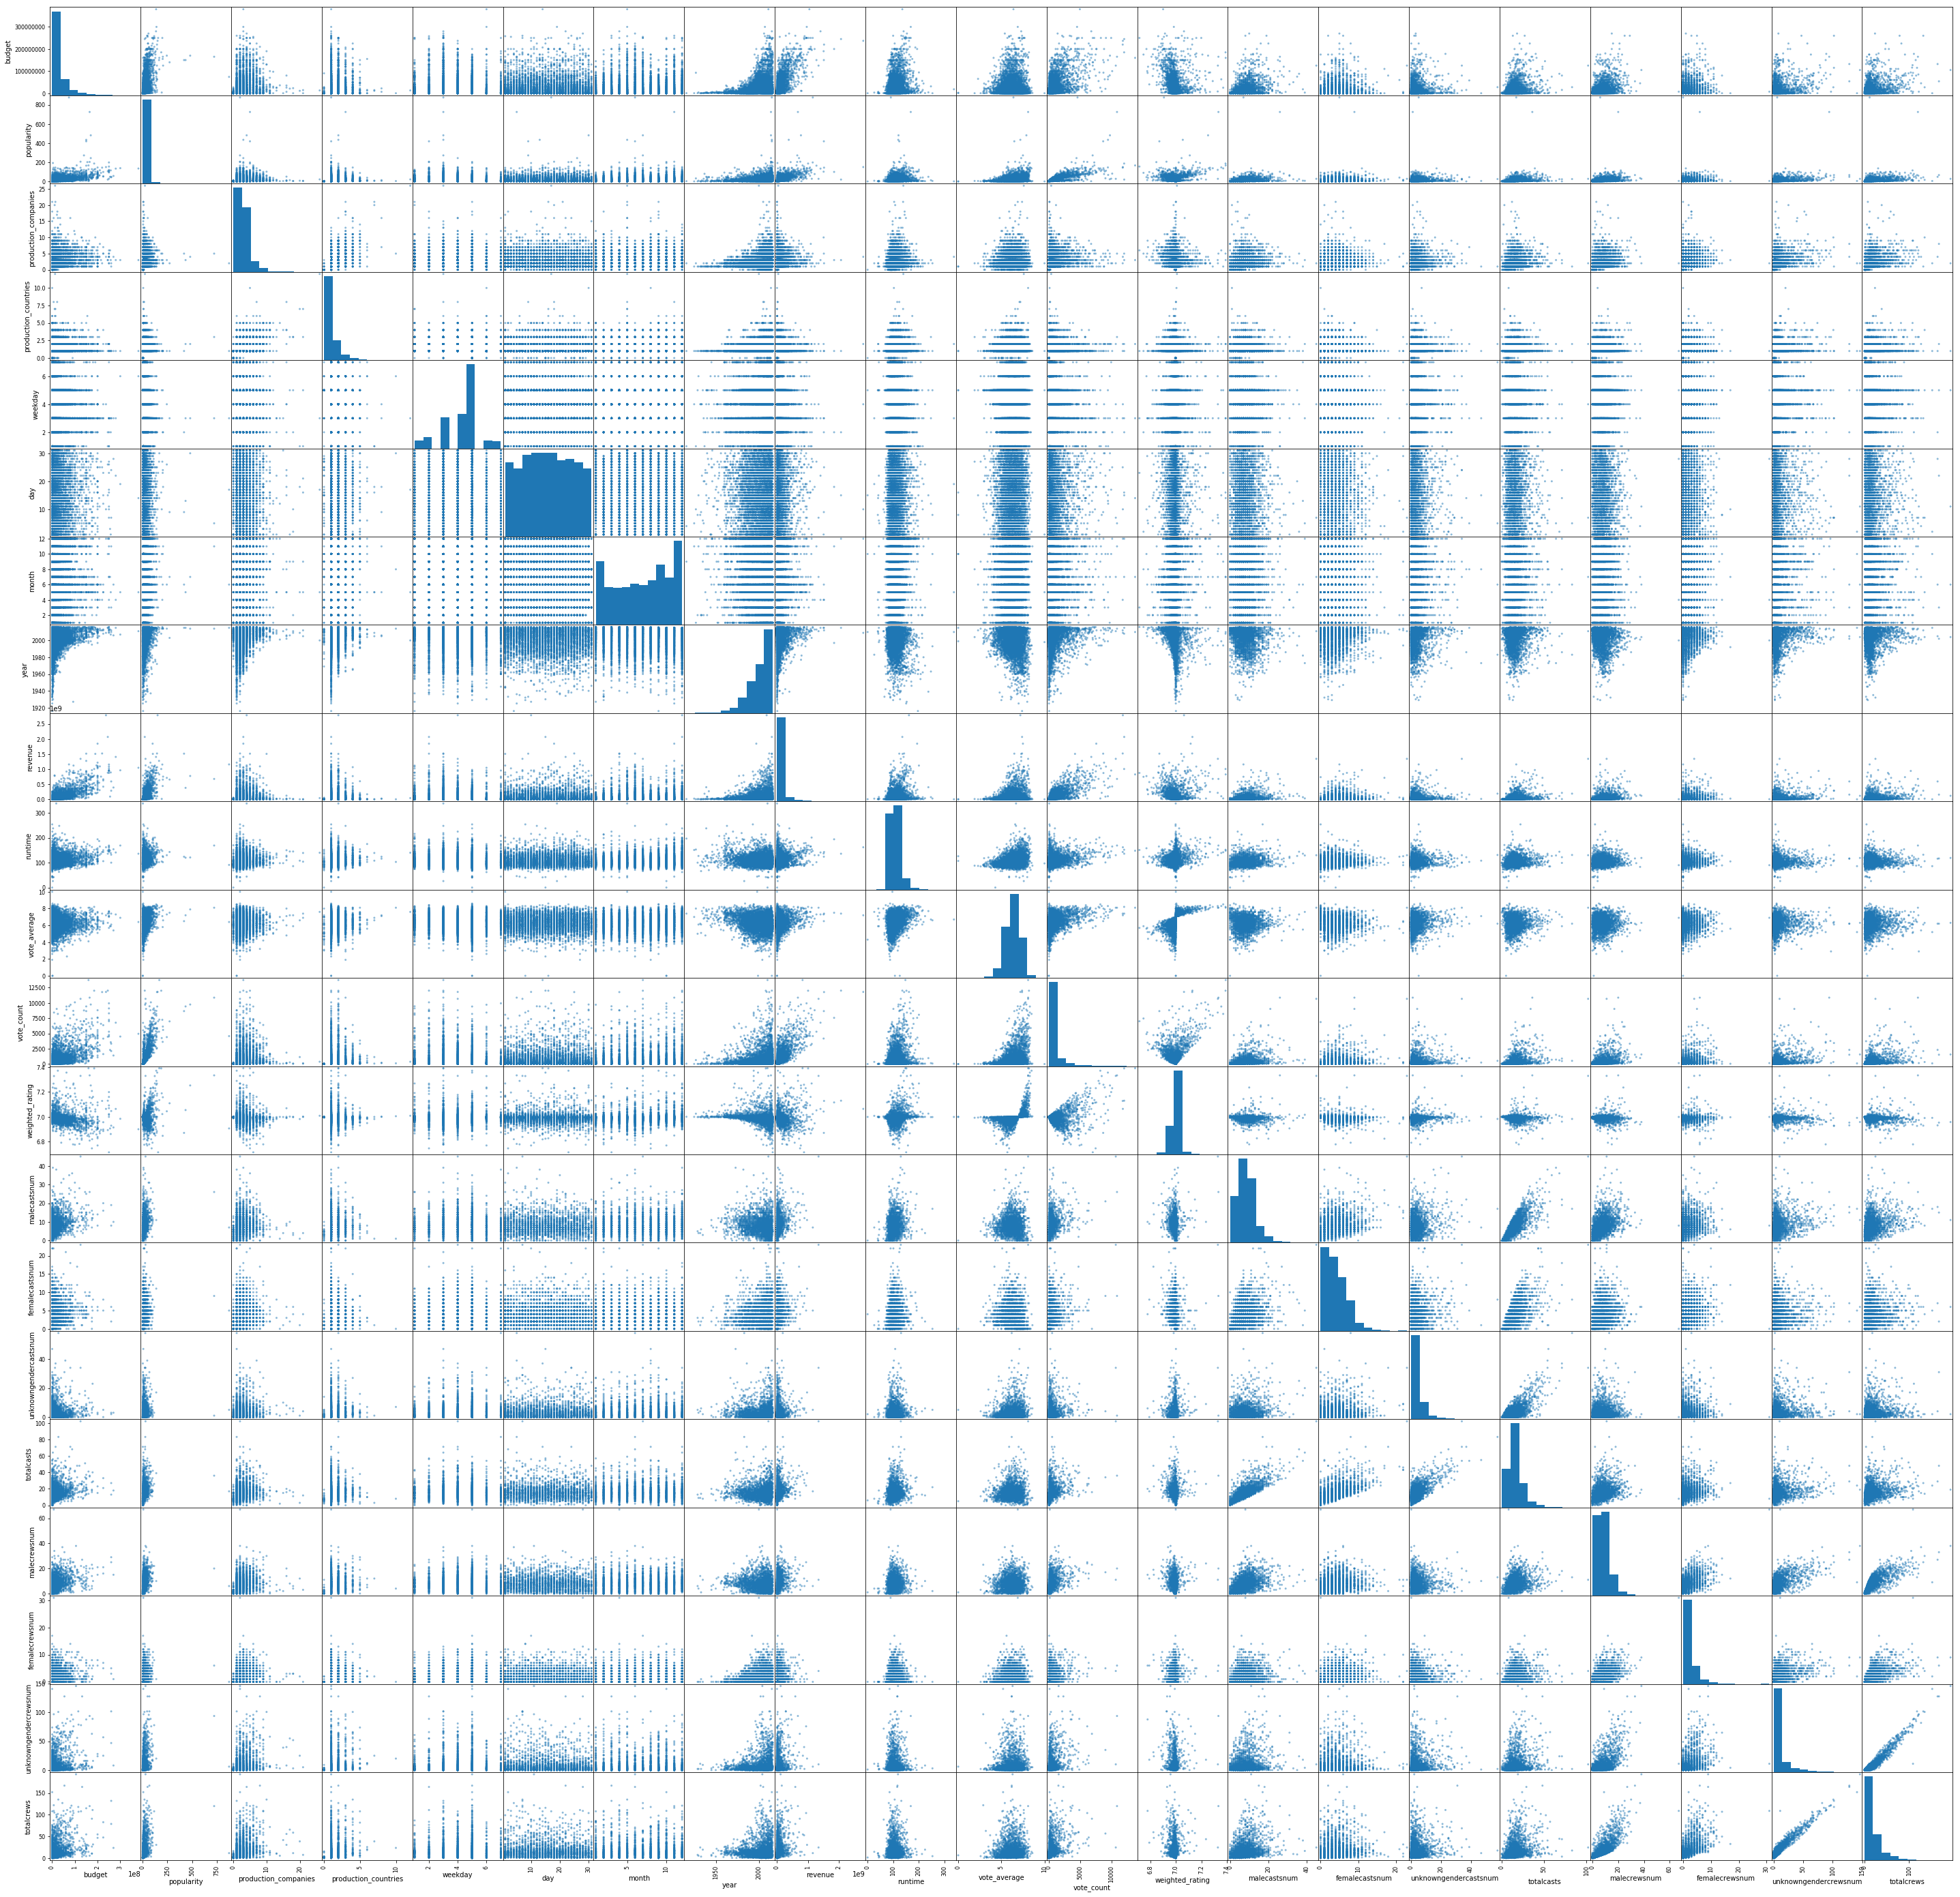

In [23]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [50,50]
# Plot scatter
pd.plotting.scatter_matrix(df)
plt.show()

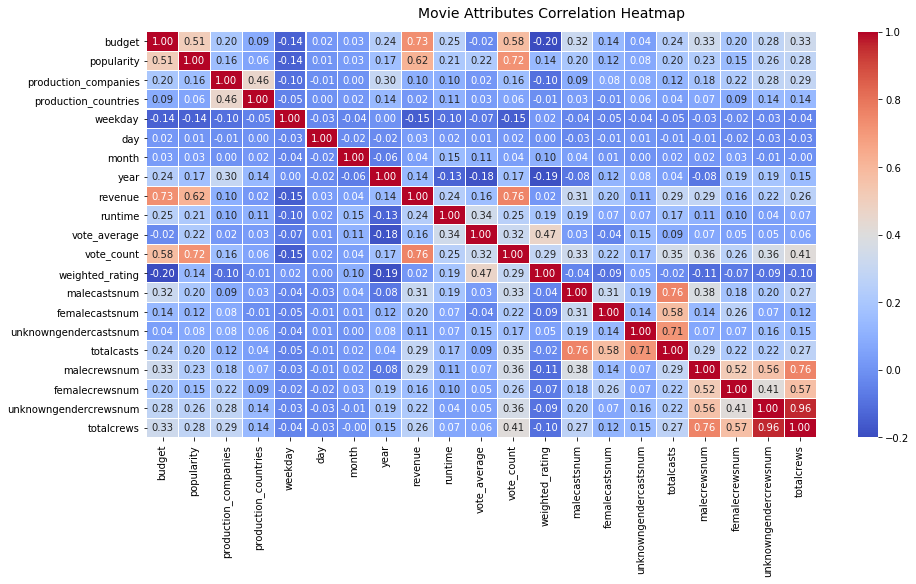

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [25]:
#descriptive statistics summary - sub in values to try
df['revenue'].describe()

count    5.499000e+03
mean     8.261262e+07
std      1.568089e+08
min      1.000000e+00
25%      6.221279e+06
50%      2.729745e+07
75%      8.949008e+07
max      2.787965e+09
Name: revenue, dtype: float64

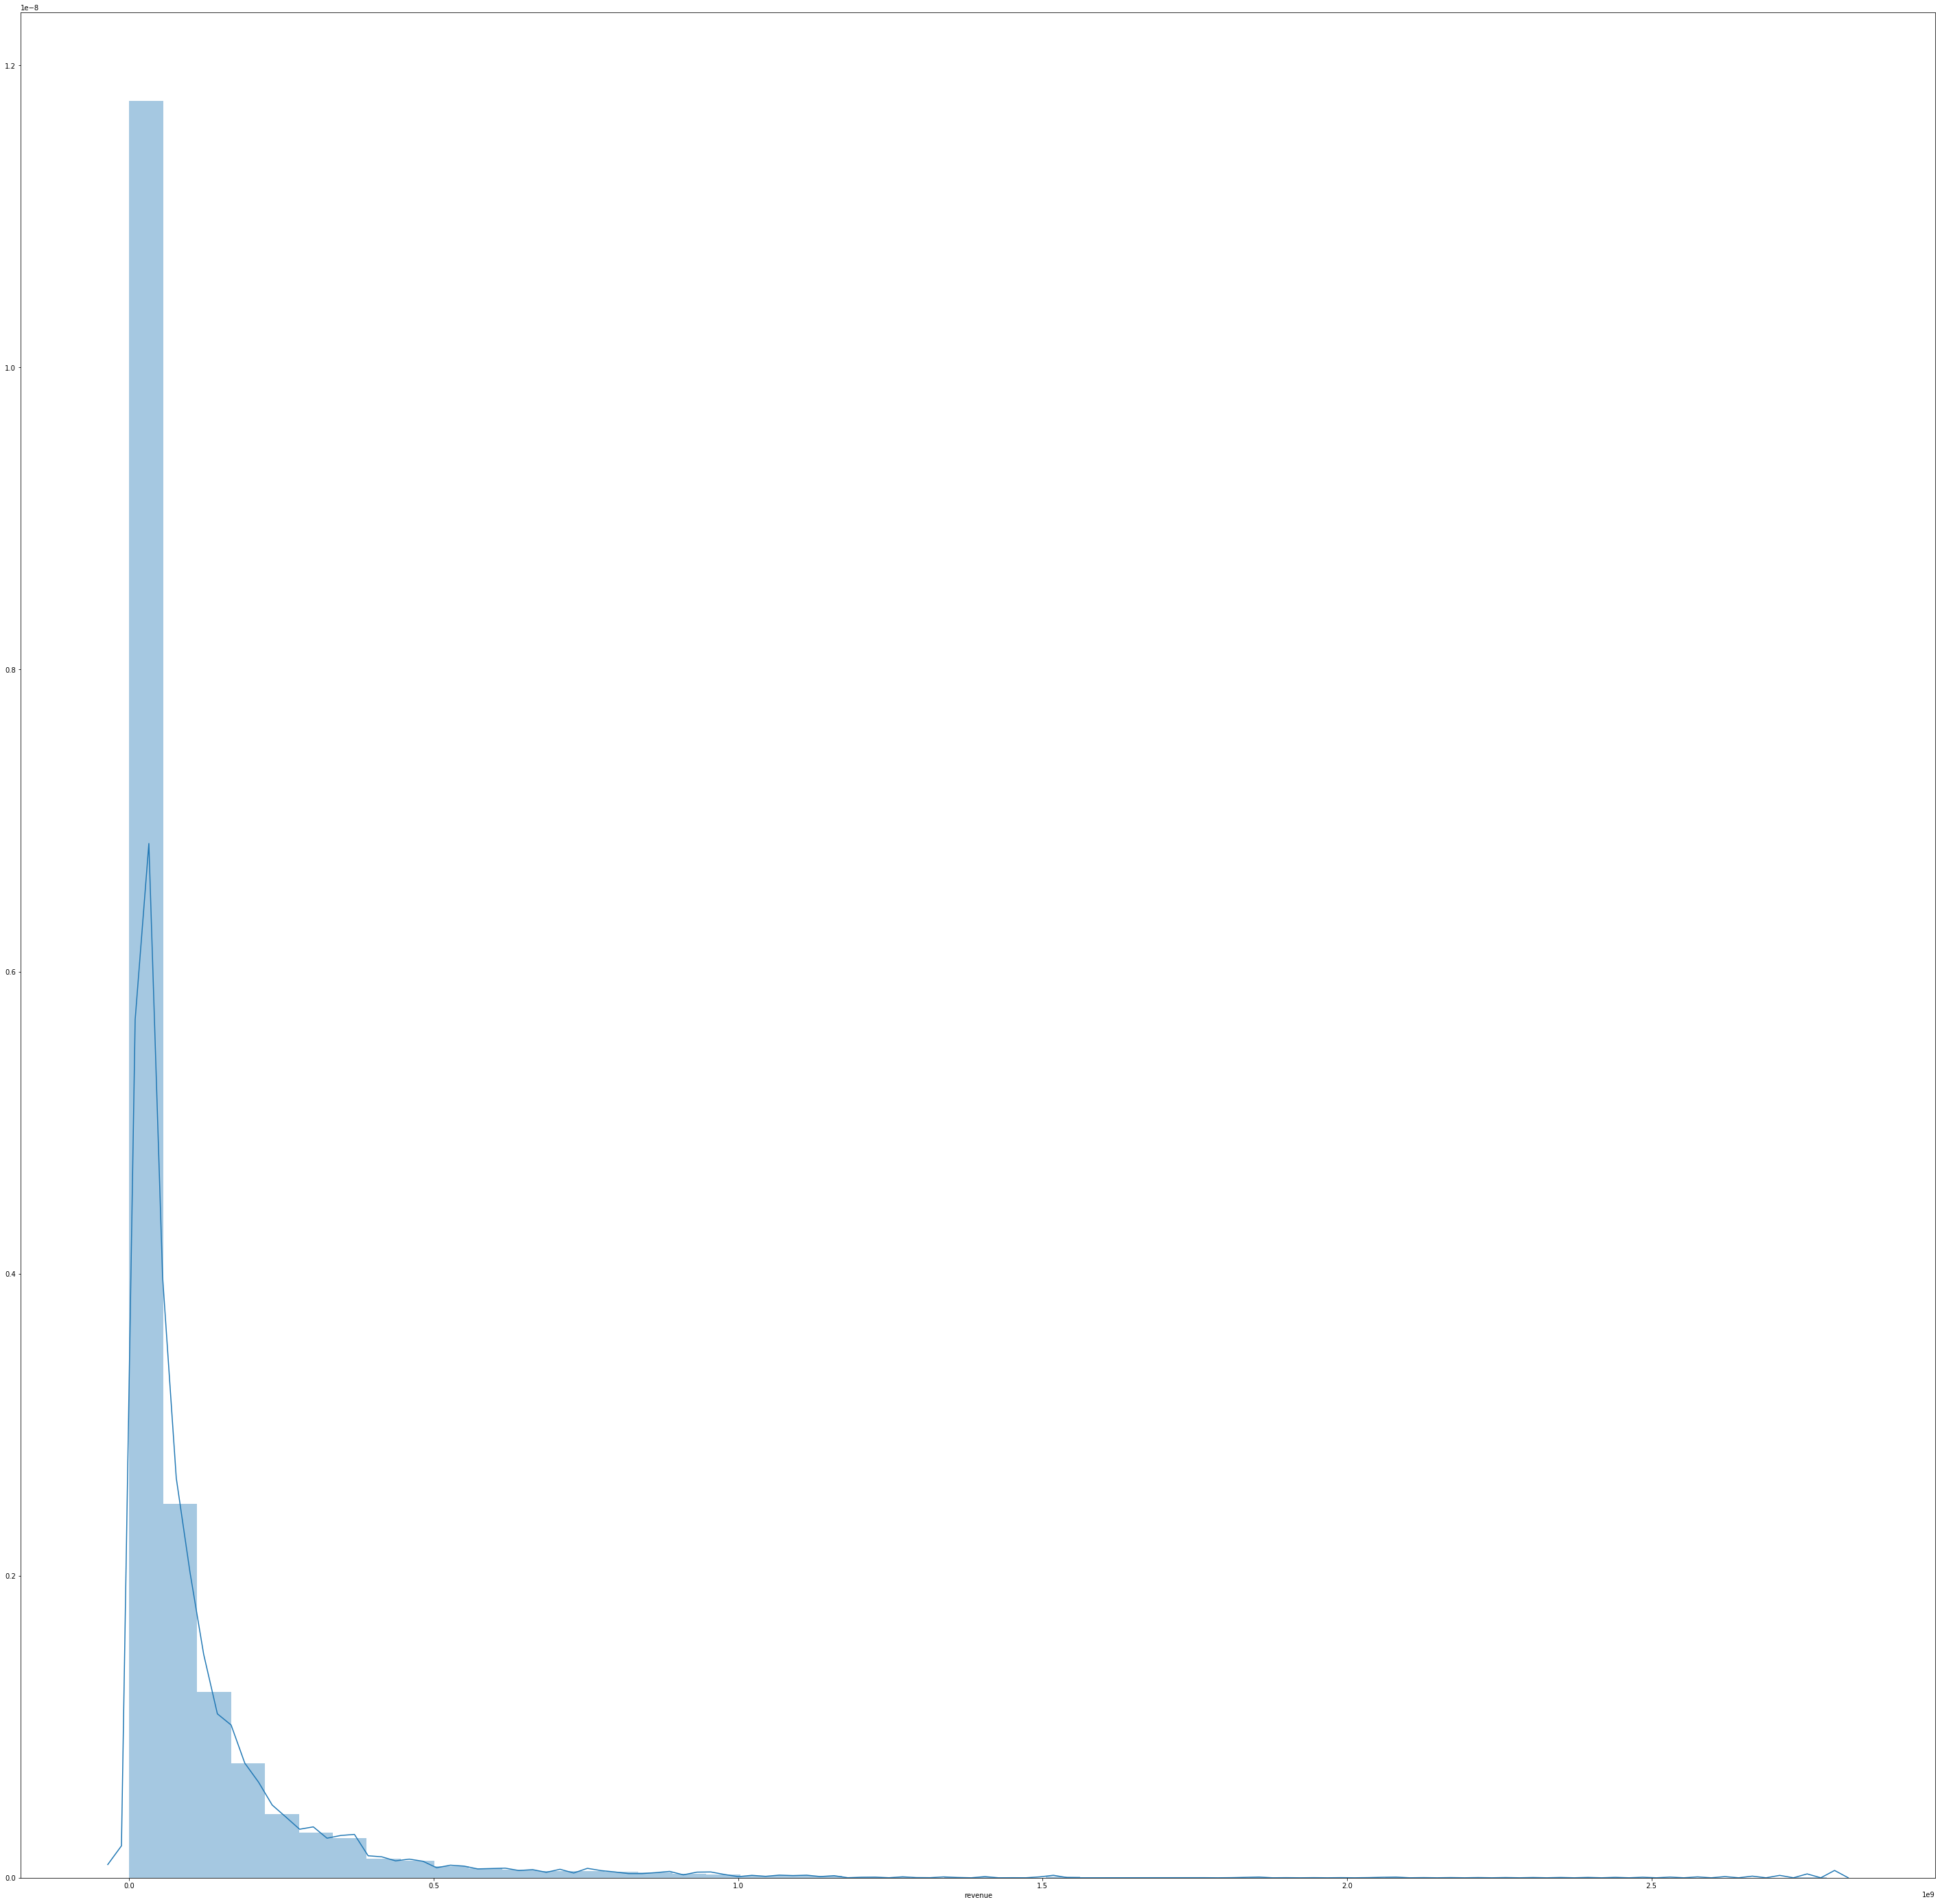

In [26]:
#histogram - sub in values to try
sns.distplot(df['revenue']);

In [27]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['revenue'].skew())
print("Kurtosis: %f" % df['revenue'].kurt()) # peak sharpness

Skewness: 4.854032
Kurtosis: 39.277983


In [28]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [30]:
# Outlier detection
outlier_datapoints = detect_outlier(df['popularity'])
# print(outlier_datapoints)
print("popularity")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['popularity']))

outlier_datapoints = detect_outlier(df['budget'])
# print(outlier_datapoints)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['budget']))

outlier_datapoints = detect_outlier(df['revenue'])
# print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['revenue']))

outlier_datapoints = detect_outlier(df['runtime'])
# print(outlier_datapoints)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['runtime']))

outlier_datapoints = detect_outlier(df['weighted_rating'])
# print(outlier_datapoints)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['weighted_rating']))

popularity
Number of Outliers: 1332
Number of Data Points: 5499
budget
Number of Outliers: 1487
Number of Data Points: 5499
revenue
Number of Outliers: 1613
Number of Data Points: 5499
runtime
Number of Outliers: 1701
Number of Data Points: 5499
weighted_rating
Number of Outliers: 1829
Number of Data Points: 5499
